In [112]:
import pyaudio
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time
from tkinter import TclError
from scipy.signal import lfilter
from scipy.fftpack import fft
import librosa
import librosa.display
import sys


In [123]:
def estimate_formants_lpc(waveform, sample_rate, num_formants=5):
    hamming_win = np.hamming(len(waveform))
    # Apply window and high pass filter.
    x_win = waveform * hamming_win
    x_filt = lfilter([1], [1.0, 0.63], x_win)

    # Get LPC. From mathworks link above, the general rule is that the
    # order is two times the expected number of formants plus 2. We use
    # 5 as a base because we discard the formant f0 and want f1...f4.
    # print(2 + int(sample_rate / 1000))
    lpc_rep = librosa.lpc(x_filt, order = 2 + int(sample_rate / 1000))
    # Calculate the frequencies.
    roots = [r for r in np.roots(lpc_rep) if np.imag(r) >= 0]
    angles = np.arctan2(np.imag(roots), np.real(roots))

    return sorted(angles * (sample_rate / (2 * np.pi)))

# y, sample_rate = librosa.load("Close-mid_front_unrounded_vowel.ogg", sr = 44100)
# for i in range(1, 13):
#     print(sample_rate)
#     formants = estimate_formants_lpc(y, sample_rate, num_formants = i)
#     print(i,formants)

# constants
CHUNK = 1024 * 2          # samples per frame
FORMAT = pyaudio.paFloat32    # audio format (bytes per sample?)
CHANNELS = 1                 # single channel for microphone
RATE = 44100                 # samples per second

p = pyaudio.PyAudio()

# stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

while True:
    ata = stream.read(CHUNK)
    # data_int = struct.unpack(str(2 * CHUNK) + 'B', data)
    # data_np = np.array(data_int, dtype='b')[::2] + 128
    data = np.frombuffer(data, dtype=np.float32)
    data = librosa.feature.mfcc(data)
    print(data)
    formants = estimate_formants_lpc(data, RATE)
    print("Formants", formants[2:5], end='\r', flush = True)


    #  728.0250692397069 1756.008505007015 2341.5099038542326


C:\Users\nebilibrahim\AppData\Local\Temp\ipykernel_16632\3075114704.py:47: FutureWarning: Pass y=[-5.5219466e+29  2.7226011e-29  6.1674708e-34 ...  2.2958916e-39
  2.8469522e-39  1.5612413e-39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.feature.mfcc(data)


ParameterError: Audio buffer is not finite everywhere

In [23]:
y, sample_rate = librosa.load("ae.wav")
y_fft = scipy.fftpack.fft(y)
peaks, peaks_dict = scipy.signal.find_peaks(np.abs(y_fft), height = 10, distance = 30)
print(peaks, peaks_dict)
sorted_indexes = np.argsort(peaks_dict["peak_heights"])
sorted_peaks = peaks[sorted_indexes]
sorted_peaks = [ s for s in sorted_peaks if 230 < s < 3700]
print(sorted_peaks)

# print(np.sort(np.array([peaks, peaks_dict["peak_heights"]]), key = lambda x: x[1]))

# S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# plt.figure()
# librosa.display.specshow(S_db)
# plt.colorbar()
# a = lb.lpc(y, order=4)
# b = np.hstack([[0], -1 * a[1:]])
# y_hat = lfilter(b, [1], y)
# print(y, y_hat)
# roots = np.roots(y_hat)
# print(roots)
# roots = [r for r in roots if np.imag(r) >= 0]
# angles = np.arctan2(np.imag(roots), np.real(roots))
# frqs = sorted(angles * (sample_rate / (2 * np.pi)))
# print(frqs)



[  43   87  131  174  218  262  302  349  393  437  481  524  568  601
  655  699  744  787 6489 6532 6577 6621 6675 6708 6752 6795 6839 6883
 6927 6974 7014 7058 7102 7145 7189 7233] {'peak_heights': array([120.82267761, 103.96672058,  39.99749756,  62.76551056,
        94.61933899, 133.9838562 ,  20.28143501,  20.09707451,
        11.58670139,  16.49143219,  14.85754681,  36.60034943,
        57.32213211,  44.29045486,  17.57548523,  12.26473904,
        10.45754337,  10.98336029,  10.98336029,  10.45754337,
        12.26473904,  17.57548523,  44.29045486,  57.32213211,
        36.60034943,  14.85754681,  16.49143219,  11.58670139,
        20.09707451,  20.28143501, 133.9838562 ,  94.61933899,
        62.76551056,  39.99749756, 103.96672058, 120.82267761])}
[744, 787, 393, 699, 481, 437, 655, 349, 302, 524, 601, 568, 262]


Type <class 'parselmouth.Sound'>
HEllo 87 Object type: Formant
Object name: untitled
Date: Sat Aug 27 02:30:33 2022

Time domain:
   Start time: 0 seconds
   End time: 0.6701587301587302 seconds
   Total duration: 0.6701587301587302 seconds
Time sampling:
   Number of frames: 249
   Time step: 0.0025 seconds
   First frame centred at: 0.02507936507936509 seconds

f1 nan
f1 nan
f1 388.8987430247561
f1 379.0186320143704
f1 331.7397314451971
f1 125.84705709316921
f1 301.37910316481
f1 332.90983105059024
f1 311.3909118662863
f1 299.6403302954207
f1 262.46784707949047
f1 177.60185117510358
f1 170.8196668149915
f1 231.32592236953204
f1 244.74518291339504
f1 285.04604186122606
f1 434.30570222391236
f1 207.00441558660478
f1 239.74652269145452
f1 429.0101956065057
f1 440.64617813573
f1 461.370949894821
f1 183.88038484988658
f1 183.20126860278359
f1 148.06581381500112
f1 200.92763460040845
f1 204.55527208274293
f1 212.43228904940258
f1 222.94731859706505
f1 247.4888407998961
f1 263.5702211384813

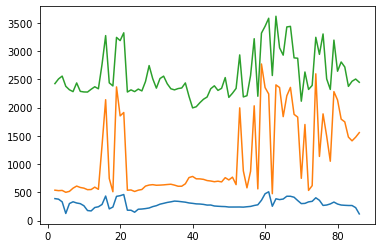

In [124]:
import parselmouth 
import librosa
import numpy as np
from parselmouth import praat
import time
# start = time.time()
y, sample_rate = librosa.load("Close_back_rounded_vowel.ogg")
start = time.time()
# for i in range(1, 10):
#     A = librosa.lpc(y,order=i)
#     rts = np.roots(A)
#     rts = [r for r in rts if np.imag(r) >= 0]

#     # Get angles.
#     angz = np.arctan2(np.imag(rts), np.real(rts))

#     # Get frequencies.

#     frqs = sorted(angz * (sample_rate / (2 * np.pi)))
#     print("freqs", frqs)
sound = parselmouth.Sound(y, sample_rate)
print("Type", type(sound))
f0min=75
f0max=300
pointProcess = praat.call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
formants = praat.call(sound, "To Formant (burg)", 0.0025, 5, 5000, 0.025, 50)
numPoints = praat.call(pointProcess, "Get number of points")
print("HEllo", numPoints, formants)
f1_list = []
f2_list = []
f3_list = []
for point in range(0, numPoints):
    point += 1
    t = praat.call(pointProcess, "Get time from index", point)
    f1 = praat.call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
    f2 = praat.call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
    f3 = praat.call(formants, "Get value at time", 3, t, 'Hertz', 'Linear')
    # f3 = 3000
    print("f1", f1)


    f1_list.append(f1)
    f2_list.append(f2)
    f3_list.append(f3)
print("Elapsed Time", time.time()- start)
plt.plot(f1_list)
plt.plot(f2_list)
plt.plot(f3_list)
start_ind, end_ind = int(.1 * len(f1_list)), int(0.9 * len(f1_list))
print(np.nanmean(f1_list[start_ind:end_ind]), np.nanmean(f2_list[start_ind:end_ind]), np.nanmean(f3_list[start_ind:end_ind]))
print(np.nanmean(f1_list), np.nanmean(f2_list), np.nanmean(f3_list))

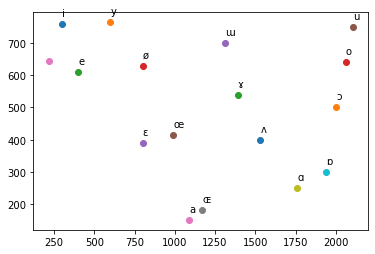

In [103]:
import pandas as pd

vowel_formants_df = pd.read_excel("vowel_formants.xlsx")
vowel_formants_df

# plt.scatter(vowel_formants_df["F1"], vowel_formants_df["F2"])
for i , row in vowel_formants_df.iterrows():
    x = -row["F2"] + 2700
    y = -row["F1"] + 1000
    plt.scatter(x, y)
    plt.annotate(row["Vowel"], (x,y + 25))
# for i, row in vowel_formants_df.iterrows():
#     plt.scatter()
#     plt.plot(row["Vowel"])

plt.scatter(-np.nanmean(f2_list) + 2700, -np.nanmean(f1_list)+1000)